In [1]:
#--------------------------------
## IMPORTS
#--------------------------------
import sys
import os

# set the path to find the modules
sys.path.insert(0, '../005_src/') #use relative path
#os.chdir("../005_src")

from config import *

----------------------------------------
Packages import successful
Variables import successful
Helper Functions import successful
Functions import successful
Functions xml import successful
Functions graph import successful
Functions GCN import successful
Functions Plotting import successful
----------------------------------------
root directory: /storage/remote/atcremers50/ss21_multiagentcontrol/
input directory: /storage/remote/atcremers50/ss21_multiagentcontrol/004_data/
output directory: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/
----------------------------------------



In [40]:
intention_dict_1 = {0: "U_turn",1:"Straight",2:"Turn_Left",3:"Turn_Right"}

In [2]:
device = cudaOverview()

CUDA not available, running on cpu


In [3]:
from _03_Networks.GCN_004.GCN_model_004 import *
check_import()
from _03_Networks.GCN_004.GCN_trainer_004 import *
this_GCN, ts = check_import()
this_date = get_date()

imported model: GCN_004 at 18h23m49s
edges_attr=True
imported trainer: GCN_004 at 18h23m49s


In [4]:
##================================
## INIT SAVING PATHS
##================================

MODEL_OUTPUT_PATH = os.path.join(OUTPUT_DIR,f"{this_GCN}/")
MODEL_OUTPUT_PATH_TODAY = os.path.join(MODEL_OUTPUT_PATH,f"{this_date}{ts}/")
print (MODEL_OUTPUT_PATH_TODAY)
if not os.path.exists(MODEL_OUTPUT_PATH_TODAY):
    Path(MODEL_OUTPUT_PATH_TODAY).mkdir(parents=True, exist_ok=True)
    
dict_text_output = {}

/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_004/20210710-18h23m49s/


In [5]:
##================================
## MODEL VAR
##================================

random_seed = 42
train_size = 0.9  
batch_size = 100 # maybe 100 is too much...

Nepochs =100
savestat = True
save_every = int(Nepochs/2) # temp pkl, pt, png, can delete after final is stored
transformstat = False
plotstat = True
printstat = True

training_losses = []
validation_losses = []
lr_rates = []

# create keys and values for all the stuff that you want later on print out in txt files
dict_text_output.update({
                    'run_time':ts,
                    'model': this_GCN,
                    'random_seed': random_seed,
                    'train_size':train_size,
                    'batch_size': batch_size,
                    'Nepochs': Nepochs,
                    'save_every':save_every, 
                    'transformstat': transformstat,
                    'plotstat': plotstat,
                    'printstat' : printstat
    
                    })


In [6]:
##================================
## LOAD DATA
##================================
input_file_name = "20210710-13h21m45s_timesteps15000_ec3500_em7000"
dict_text_output["input_file_name"] = input_file_name

txt_data = os.path.join(GCN_INPUT_FOLDER,f"{input_file_name}.txt")
dict_text_data = read_txt_data(txt_data)

dict_text_output['input_file_name'] = input_file_name

In [7]:
##if plotstat:
#path_figure = read_txt_data(dict_text_data['info_input_df'])["path_figure"]
#Image(open(f'{path_figure}','rb').read())

In [8]:
##if plotstat:
#path_GIF = dict_text_data["path_GIF"]
#Image(open(f'{path_GIF}','rb').read())

The function "" select only the rows marked with "training row" True.


In [9]:
df_all,df_selected = select_rows_from_data(input_file_name,drop_col = True)
df_all.loc[15]

data_x                [[180.0, 19.49, 1.0], [0.0, 16.23, 1.0], [90.0...
data_pos                [[98.4, 29.75], [101.6, 107.05], [31.88, 98.4]]
data_edges                                       [[0, 0, 1], [1, 2, 2]]
data_edges_renamed                               [[0, 0, 1], [1, 2, 2]]
data_y                      [[101.6, 140.07, 0.0], [55.94, 98.4, 90.0]]
data_edges_attr                                         [2.0, 1.9, 2.2]
training_row                                                      False
Name: 15, dtype: object

In [10]:
len(df_selected), len(df_all)

(10105, 14995)

In [11]:
df_input = df_selected

In [12]:
dict_text_data.keys()

dict_keys(['max_num_veh', 'date', 'time', 'usr', 'env', 'path_input_df', 'info_input_df', 'sim_duration_timesteps', 'edge_creation_radius', 'edge_maintenance_radius', 'edge_weights_option', 'predict_after_timesteps', 'savestat', 'delete_temporary_files', 'plotstat', 'path_GCN_input', 'path_GIF'])

In [13]:
# get the max number of vehicle per time step M
# input data_x [Mx3]
# input data_pos [Mx2]
# output y [Mx3]
M = int(dict_text_data['max_num_veh'])
sim_duration_timesteps = dict_text_data['sim_duration_timesteps']
print (f"max_num_veh: {M}")
print (f"sim_duration_timesteps: {sim_duration_timesteps}")



max_num_veh: 10
sim_duration_timesteps: 15000


In [14]:
##================================
## TRAIN AND VALIDATION 
##================================
c = df_input.index.tolist()
train_frames, valid_frames = train_test_split(
                                c,
                                random_state=random_seed,
                                train_size=train_size,
                                shuffle=True)

valid_frames, test_frames = train_test_split(
                                valid_frames,
                                random_state=random_seed,
                                train_size=0.9,
                                shuffle=True)

dict_text_output['num_rows_training'] = len(train_frames)
dict_text_output['num_rows_validation'] = len(valid_frames)
dict_text_output['num_rows_test'] = len(test_frames)

In [15]:
##================================
## TRANSFORMATIONS
##================================
if transformstat: 
    # not implemented, not needed i think
    transforms_training = None
    transforms_validation = None
else:
    transforms_training = None
    transforms_validation = None

In [16]:
##================================
## VARIATIONS
##================================

exclude_yaw = True
paddingstat = False
concatenatestat = True

if concatenatestat:
    size_input = 5
    print (f"Input: concatenation(data_x,data_pos) [bacth_size,{size_input}]")
else:
    size_input = 3
    print (f"Input: concatenation(data_x) [bacth_size,{size_input}]")
if exclude_yaw:
    size_output = 2
    print (f"Predicting: X, Y [bacth_size,{size_output}]")
else:
    size_output = 3
    print (f"Predicting: X, Y, Yaw [bacth_size,{size_output}]")
    
dict_text_output['exclude_yaw'] = exclude_yaw
dict_text_output['concatenatestat'] = concatenatestat
dict_text_output['paddingstat'] = paddingstat
dict_text_output['size_input'] = f"[{batch_size,size_input}]"
dict_text_output['size_output'] = f"[{batch_size,size_output}]"

Input: concatenation(data_x,data_pos) [bacth_size,5]
Predicting: X, Y [bacth_size,2]


In [17]:
##================================
## CREATING THE DATASET
##================================
print (f"> CREATING THE DATASET")
dataset_train = Dataset_GCN(
                     df_input,
                     train_frames,
                     #transform=transforms_training,
                     M = M,
                     printstat = False,
                     concatenatestat = concatenatestat,
                     paddingstat = paddingstat,
                     exclude_yaw = exclude_yaw
                     )
dataset_val = Dataset_GCN(
                     df_input,
                     valid_frames,
                     M = M,
                     concatenatestat = concatenatestat,
                     paddingstat = paddingstat,
                     exclude_yaw = exclude_yaw
                     )
dataset_test = Dataset_GCN(
                     df_input,
                     test_frames,
                     M = M,
                     concatenatestat = concatenatestat,
                     paddingstat = paddingstat,
                     exclude_yaw = exclude_yaw
                     )
printif(dataset_train, n = 10)

  0%|          | 0/9094 [00:00<?, ?it/s]

> CREATING THE DATASET


100%|██████████| 102/102 [00:00<00:00, 157.95it/s]

0) Data(edge_attr=[45], edge_index=[2, 45], pos=[10, 2], x=[10, 5], y=[10, 2])
1) Data(edge_attr=[45], edge_index=[2, 45], pos=[10, 2], x=[10, 5], y=[10, 2])
2) Data(edge_attr=[45], edge_index=[2, 45], pos=[10, 2], x=[10, 5], y=[10, 2])
3) Data(edge_attr=[45], edge_index=[2, 45], pos=[10, 2], x=[10, 5], y=[10, 2])
4) Data(edge_attr=[45], edge_index=[2, 45], pos=[10, 2], x=[10, 5], y=[10, 2])
...
9089) Data(edge_attr=[45], edge_index=[2, 45], pos=[10, 2], x=[10, 5], y=[10, 2])
9090) Data(edge_attr=[45], edge_index=[2, 45], pos=[10, 2], x=[10, 5], y=[10, 2])
9091) Data(edge_attr=[45], edge_index=[2, 45], pos=[10, 2], x=[10, 5], y=[10, 2])
9092) Data(edge_attr=[45], edge_index=[2, 45], pos=[10, 2], x=[10, 5], y=[10, 2])
9093) Data(edge_attr=[45], edge_index=[2, 45], pos=[10, 2], x=[10, 5], y=[10, 2])


In [18]:
dataset_train[0]

Data(edge_attr=[45], edge_index=[2, 45], pos=[10, 2], x=[10, 5], y=[10, 2])

In [19]:
##================================
# DataLoader
##================================
train_loader = DataLoader(dataset_train, batch_size=10, shuffle=False)
val_loader = DataLoader(dataset_val, batch_size=10, shuffle=False)
test_loader = DataLoader(dataset_test, batch_size=10, shuffle=False)

In [20]:
print(f"{len(train_loader.dataset)=}")
print(f"{len(val_loader.dataset)=}")
print(f"{len(test_loader.dataset)=}")

len(train_loader.dataset)=9094
len(val_loader.dataset)=909
len(test_loader.dataset)=102


## GCN

In [21]:
model = GCN(num_input_features=size_input,
            num_output_features =size_output,
            random_seed = random_seed,
            hc_1 = 16,
            hc_2 = 32
           )

criterion = torch.nn.MSELoss()  # Define loss criterion for regression
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)#, weight_decay=5e-4)  # Define optimizer.



In [22]:
print(model)
dict_text_output['model_architecture'] = model

GCN(
  (conv1): GCNConv(5, 16)
  (conv2): GCNConv(16, 32)
  (conv3): GCNConv(32, 2)
)


In [23]:
from statistics import mean

In [24]:
mean([1,4])

2.5

In [25]:
training_losses = []
validation_losses = []

In [27]:
# run
if Nepochs <= 100:
    for epoch in (range(1, Nepochs+1)):
        epoch_training_losses = []
        epoch_training_losses,description,model_path = train(
                                                        model,
                                                        optimizer,
                                                        criterion,
                                                        train_loader,
                                                        epoch_training_losses,
                                                        printstat= True,

                                                        savestat = savestat,
                                                        Nepochs = Nepochs,
                                                        save_every = save_every,
                                                        epoch_num = epoch,
                                                        save_dir = MODEL_OUTPUT_PATH_TODAY,
                                                        model_name = this_GCN,
                                                        date = this_date,
                                                        ts = ts,
                                              )
        epoch_loss = mean(epoch_training_losses)
        training_losses.append(epoch_loss)
        print(f'Epoch: {epoch}, Loss: {epoch_loss}')
else: 
    for epoch in tqdm(range(1, Nepochs)):
        epoch_training_losses = []
        epoch_training_losses,description,model_path = train(
                                                        model,
                                                        optimizer,
                                                        criterion,
                                                        train_loader,
                                                        epoch_training_losses,
                                                        printstat= printstat,

                                                        savestat = savestat,
                                                        Nepochs = Nepochs,
                                                        save_every = save_every,
                                                        epoch_num = epoch,
                                                        save_dir = MODEL_OUTPUT_PATH_TODAY,
                                                        model_name = this_GCN,
                                                        date = this_date,
                                                        ts = ts,
            
                                          )
        epoch_loss = mean(epoch_training_losses)
        training_losses.append(epoch_loss)
        

Epoch: 1, Loss: 1854.9146421327696
Epoch: 2, Loss: 1775.4617457127833
Epoch: 3, Loss: 1767.2651831322974
Epoch: 4, Loss: 1767.8520620492789
Epoch: 5, Loss: 1744.3458838829627
Epoch: 6, Loss: 1698.6011557778158
Epoch: 7, Loss: 1681.5979775229653
Epoch: 8, Loss: 1663.204070843707
Epoch: 9, Loss: 1646.0479422433036
Epoch: 10, Loss: 1636.8231460738969
Epoch: 11, Loss: 1620.0927983210638
Epoch: 12, Loss: 1603.6666017637149
Epoch: 13, Loss: 1592.2938711313102
Epoch: 14, Loss: 1622.3716584258027
Epoch: 15, Loss: 1557.3854504931105
Epoch: 16, Loss: 1548.221805715037
Epoch: 17, Loss: 1561.0189140571342
Epoch: 18, Loss: 1517.8233830378606
Epoch: 19, Loss: 1482.6668640807434
Epoch: 20, Loss: 1487.7551506293999
Epoch: 21, Loss: 1495.6981867192865
Epoch: 22, Loss: 1529.6617856203854
Epoch: 23, Loss: 1467.4129635989011
Epoch: 24, Loss: 1466.0957127833105
Epoch: 25, Loss: 1398.0042778266654
Epoch: 26, Loss: 1371.393970330207
Epoch: 27, Loss: 1364.526687856821
Epoch: 28, Loss: 1377.185136262663
Epoch:

In [28]:
model_path

'/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_004/20210710-18h23m49s/20210710-18h23m49s_epoch100_FINAL_GCN_004.pt'

## Saving 

Plot saved in /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_004/20210710-18h23m49s/20210710-18h23m49s_epoch100_FINAL_training_loss_plot.png


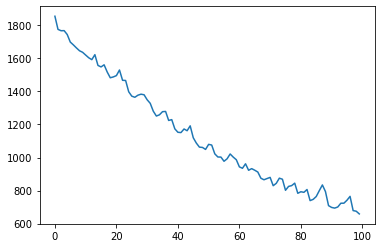

In [31]:
figsize = (10,10)
plt.plot(range(0,len(training_losses)), training_losses)
new_png = f"{description}_training_loss_plot.png"
new_png_path = os.path.join(MODEL_OUTPUT_PATH_TODAY,new_png)
plt.savefig(new_png_path)
print (f"Plot saved in {new_png_path}")

In [32]:
tloss_descr = f"{description}_training_loss"
tloss_path = os.path.join(MODEL_OUTPUT_PATH_TODAY,tloss_descr)
with open(f'{tloss_path}.pkl', 'wb') as f:
    pkl.dump(mean(epoch_training_losses), f)
    
dict_text_output['tloss_path']= tloss_path

In [33]:
dict_text_output_descr = f"{description}_training_parameters"
dict_text_output_path = os.path.join(MODEL_OUTPUT_PATH_TODAY,dict_text_output_descr)
with open(f'{dict_text_output_path}.pkl', 'wb') as handle:
    pkl.dump(dict_text_output, handle, protocol=pkl.HIGHEST_PROTOCOL)
    
TXT_OUTPUT = f'{dict_text_output_path}.txt'
with open(TXT_OUTPUT, 'w') as filehandle:
    for k,v in dict_text_output.items():
        filehandle.write(f'{k}: {v}\n')
    filehandle.close()

In [34]:
# unpickle to check 
reloaded_dict = pkl.load(open(f'{dict_text_output_path}.pkl',"rb"))
reloaded_dict

{'run_time': '18h23m49s',
 'model': 'GCN_004',
 'random_seed': 42,
 'train_size': 0.9,
 'batch_size': 100,
 'Nepochs': 100,
 'save_every': 50,
 'transformstat': False,
 'plotstat': True,
 'printstat': True,
 'input_file_name': '20210710-13h21m45s_timesteps15000_ec3500_em7000',
 'num_rows_training': 9094,
 'num_rows_validation': 909,
 'num_rows_test': 102,
 'exclude_yaw': True,
 'concatenatestat': True,
 'paddingstat': False,
 'size_input': '[(100, 5)]',
 'size_output': '[(100, 2)]',
 'model_architecture': GCN(
   (conv1): GCNConv(5, 16)
   (conv2): GCNConv(16, 32)
   (conv3): GCNConv(32, 2)
 ),
 'tloss_path': '/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_004/20210710-18h23m49s/20210710-18h23m49s_epoch100_FINAL_training_loss'}

In [35]:
np.set_printoptions(suppress=True)
for data in dataset_test[:1]:
    print ("--------------")
    print ("\nINPUT DATA_POS,DATA_X")
    print (np.around(data.x.detach().numpy(),2))
    print ("\nTARGET DATA_Y")
    print (data.y.detach().numpy())
    print ("\nPREDICTIONS")
    print (model(data.x, data.edge_index,data.edge_attr).detach().detach().numpy())

--------------

INPUT DATA_POS,DATA_X
[[ 91.8   98.4   90.     0.     1.  ]
 [ 84.3   98.4   90.     0.     0.  ]
 [ 98.4  108.2  180.     0.     1.  ]
 [101.6  136.65   0.    11.11   3.  ]
 [ 98.4  115.74 180.     0.05   1.  ]
 [ 89.47 101.6  270.    19.11   1.  ]
 [101.6   37.01   0.    10.12   1.  ]
 [ 76.8   98.4   90.     0.     1.  ]
 [177.18 101.6  270.     7.56   3.  ]
 [ 69.3   98.4   90.     0.     1.  ]]

TARGET DATA_Y
[[ 91.8   98.4 ]
 [ 84.3   98.4 ]
 [ 98.4  108.2 ]
 [101.6  165.43]
 [ 98.4  115.71]
 [ 50.7  101.6 ]
 [101.6   62.33]
 [ 76.8   98.4 ]
 [156.09 101.6 ]
 [ 69.3   98.4 ]]

PREDICTIONS
[[ 83.2235    85.19677 ]
 [101.2384   106.76108 ]
 [102.11246  107.80734 ]
 [ 88.12471   91.063644]
 [ 94.121956  98.24251 ]
 [103.71904  109.73047 ]
 [ 85.3209    87.70741 ]
 [ 92.368355  96.1434  ]
 [ 84.67512   86.93439 ]
 [ 90.08214   93.40674 ]]


## Plot results

In [36]:
# load model
# defining the model
load_model = GCN(num_input_features=size_input,
            num_output_features =size_output,
            random_seed = random_seed,
            hc_1 = 16,
            hc_2 = 32
           )

#load_path = "/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_004/20210710-17h55m10s/20210710-17h55m10s100_FINAL_GCN_004.pt"

load_model.load_state_dict(torch.load(model_path))
load_model.eval()



GCN(
  (conv1): GCNConv(5, 16)
  (conv2): GCNConv(16, 32)
  (conv3): GCNConv(32, 2)
)

In [53]:
def plot_results_model(
                   model,
                   dataset,
                   start_from = 0,
                   end_at = 10,
                   edges_attr = True,
                   figsize = (10,10),
                   plot_intention = True, 
                  ):
    figsize = figsize
    for i,data in enumerate(dataset[start_from:end_at]):
        #print ("--------------")
        #print (data.x)
        #print (data.y)
        IDX = i+start_from
        if edges_attr:
            pred = model(data.x,
                         data.edge_index,
                         data.edge_attr
                        ).detach().numpy()
        else: 
            pred = model(data.x,
                         data.edge_index,
                        ).detach().numpy()            
         
        ## INITIALIZE FIGURE
        fig, ax = plt.subplots(figsize= figsize) 
        #cmap = list(sns.color_palette("Paired",len(pred)).as_hex())
            
        ## PLOT INPUT
        # print (pred)
        X,Y = [], []
        INTENTION = []
        for e in data.x.detach().numpy():
            X.append(e[0])
            Y.append(e[1])
            INTENTION.append(e[-1])
            
        #select colors
        ax.set_title(f"2D map of data {IDX}");
        ax.set_xlabel("X");
        ax.set_ylabel("Y"); 
        ax.scatter(X,Y, c ="orange",alpha = 0.8,s = 300, label= "initial positions at time t")

        for i,x in enumerate(X):
            ax.annotate(str(i), (x, Y[i]), ha='center', va='center', size=14)  
            if plot_intention:
                ax.annotate(intention_dict_1[INTENTION[i]], (x+5, Y[i]+5), ha='center', va='center', size=10 , c = "red")  
            
            
        ## PLOT MODEL PREDICTIONS
        # print (pred)
        X,Y = [], []
        for e in pred:
            X.append(e[0])
            Y.append(e[1])

        #select colors
        ax.set_title(f"2D map of timestep {IDX}");
        ax.set_xlabel("X");
        ax.set_ylabel("Y"); 
        ax.scatter(X,Y, c ="lightblue",alpha = 0.5, s = 300, label= "predicted positions at time t+2")

        for i,x in enumerate(X):
            ax.annotate(str(i), (x, Y[i]), ha='center', va='center', size=14)

        ## PLOT TARGETS
        X,Y = [], []
        for e in data.y.detach().numpy():
            X.append(e[0])
            Y.append(e[1])

        ax.scatter(X,Y, c ="lightgreen",alpha = 0.5,s = 500, label = "target positions at time t+2")
        for i,x in enumerate(X):
            ax.annotate(str(i), (x, Y[i]), ha='center', va='center', size=14)
        
        
        ax.set_xlim(0,200)
        ax.set_ylim(0,200)
        ax.legend()
        ax.grid()

        plt.show()

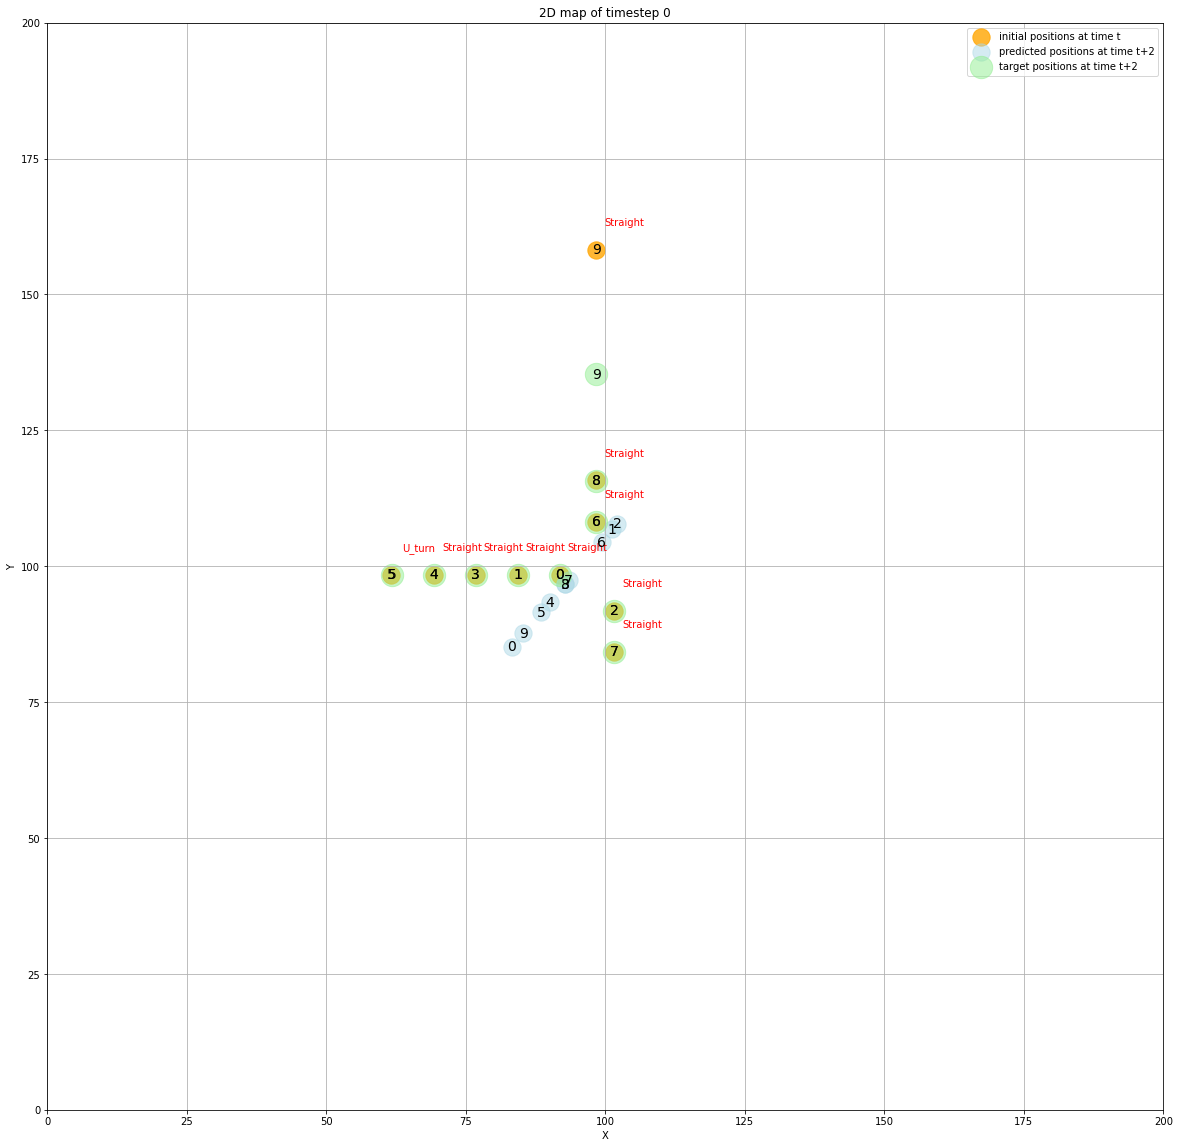

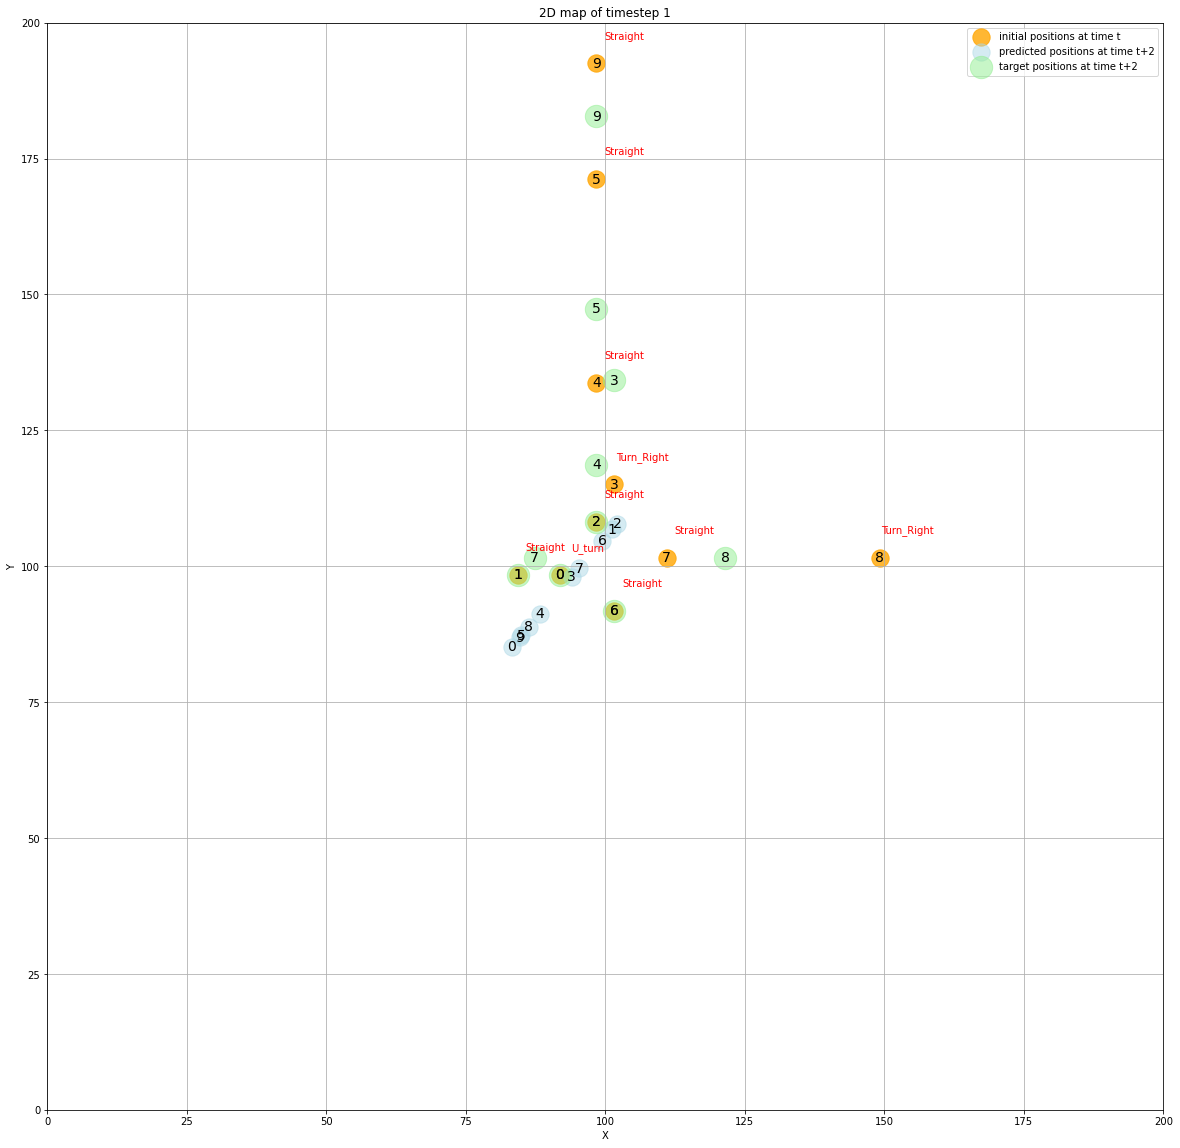

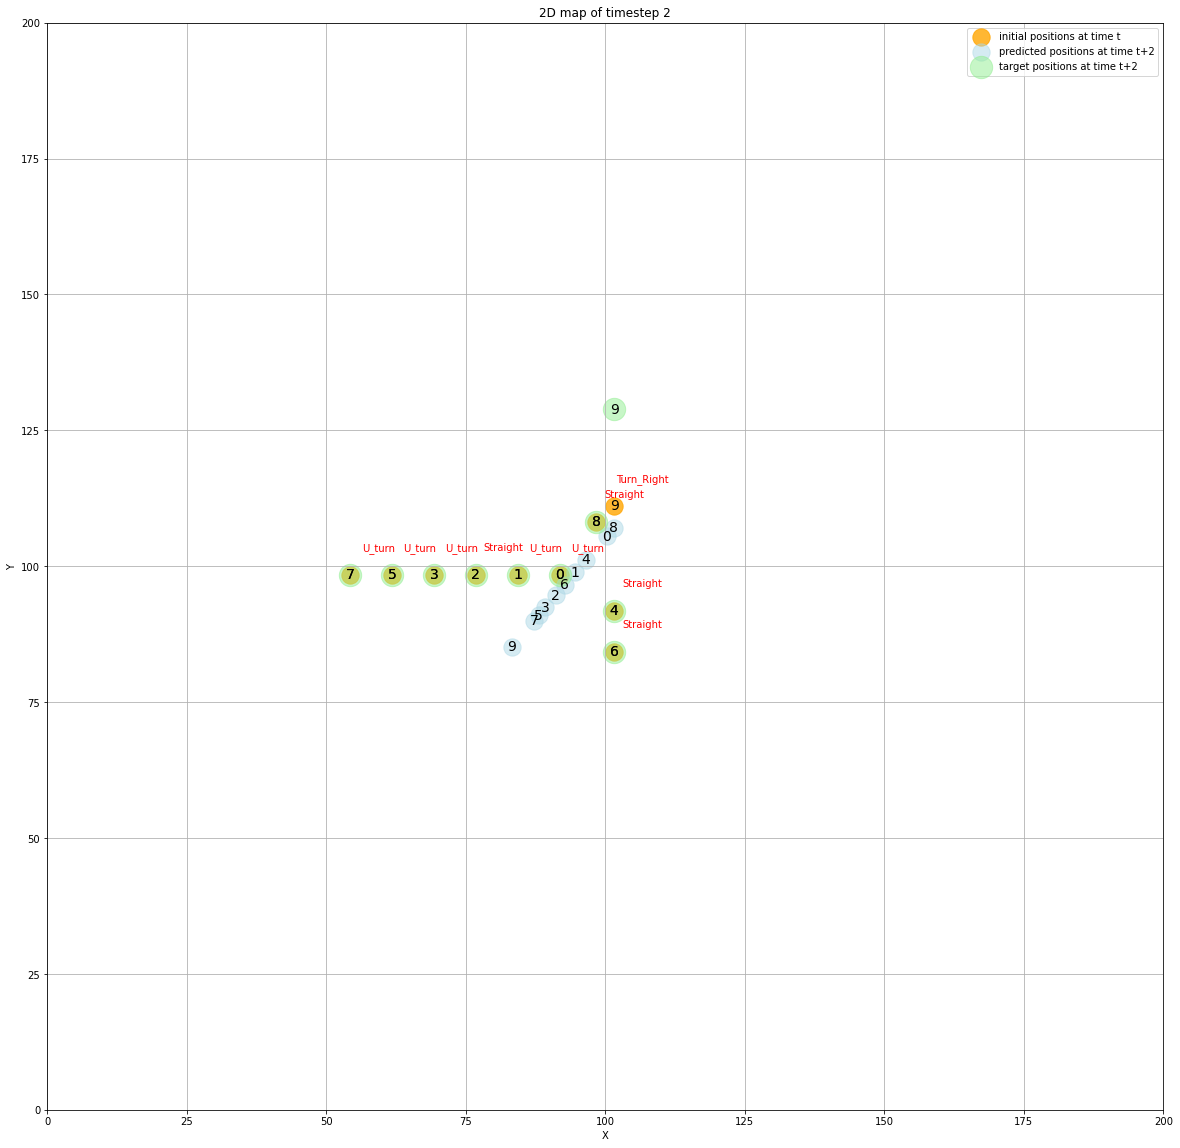

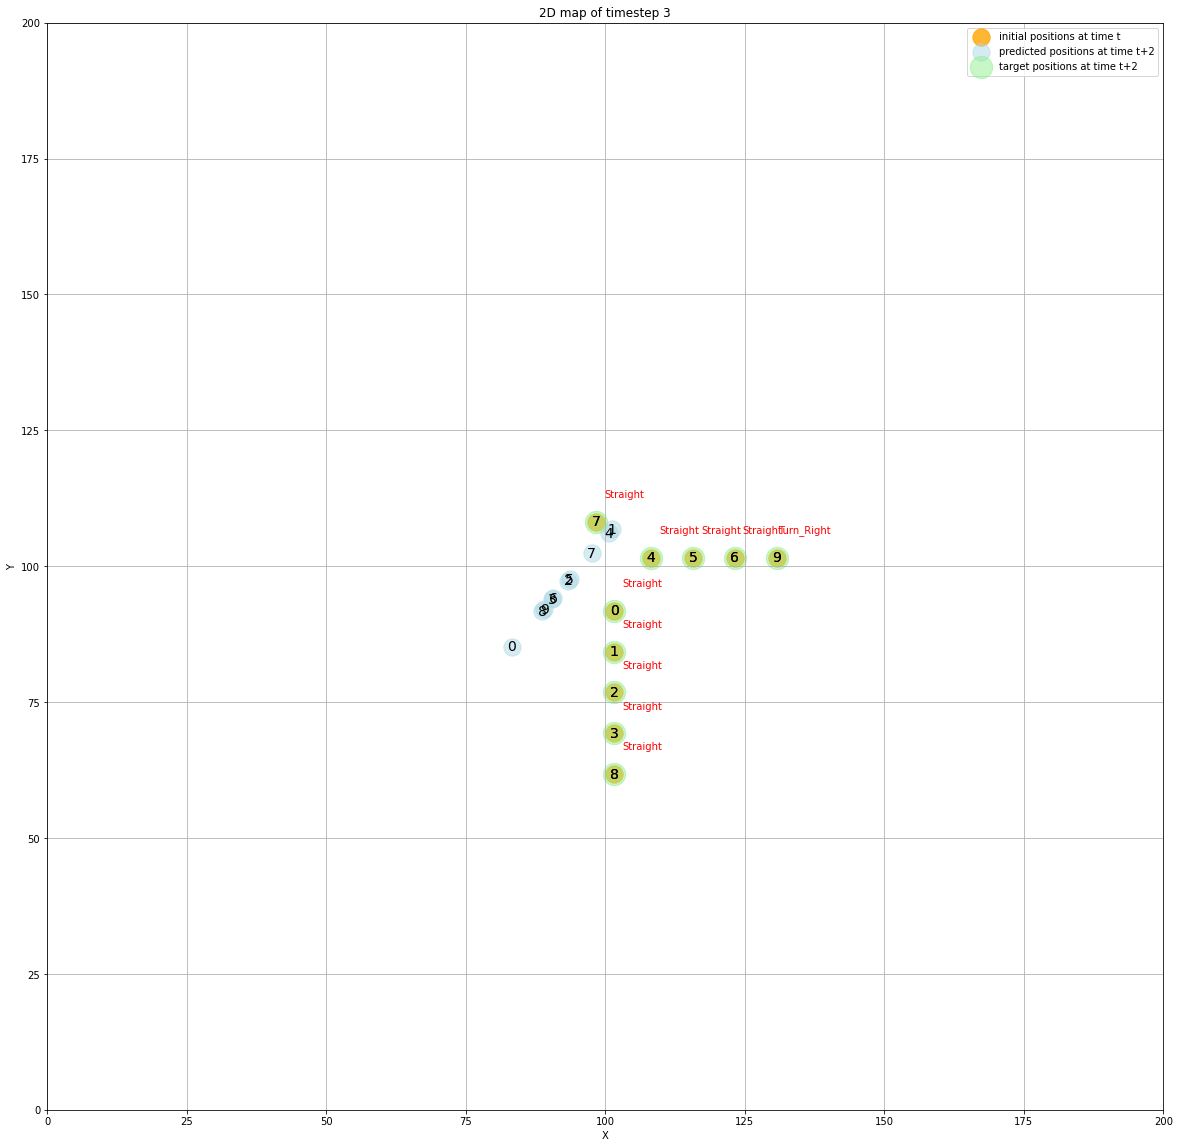

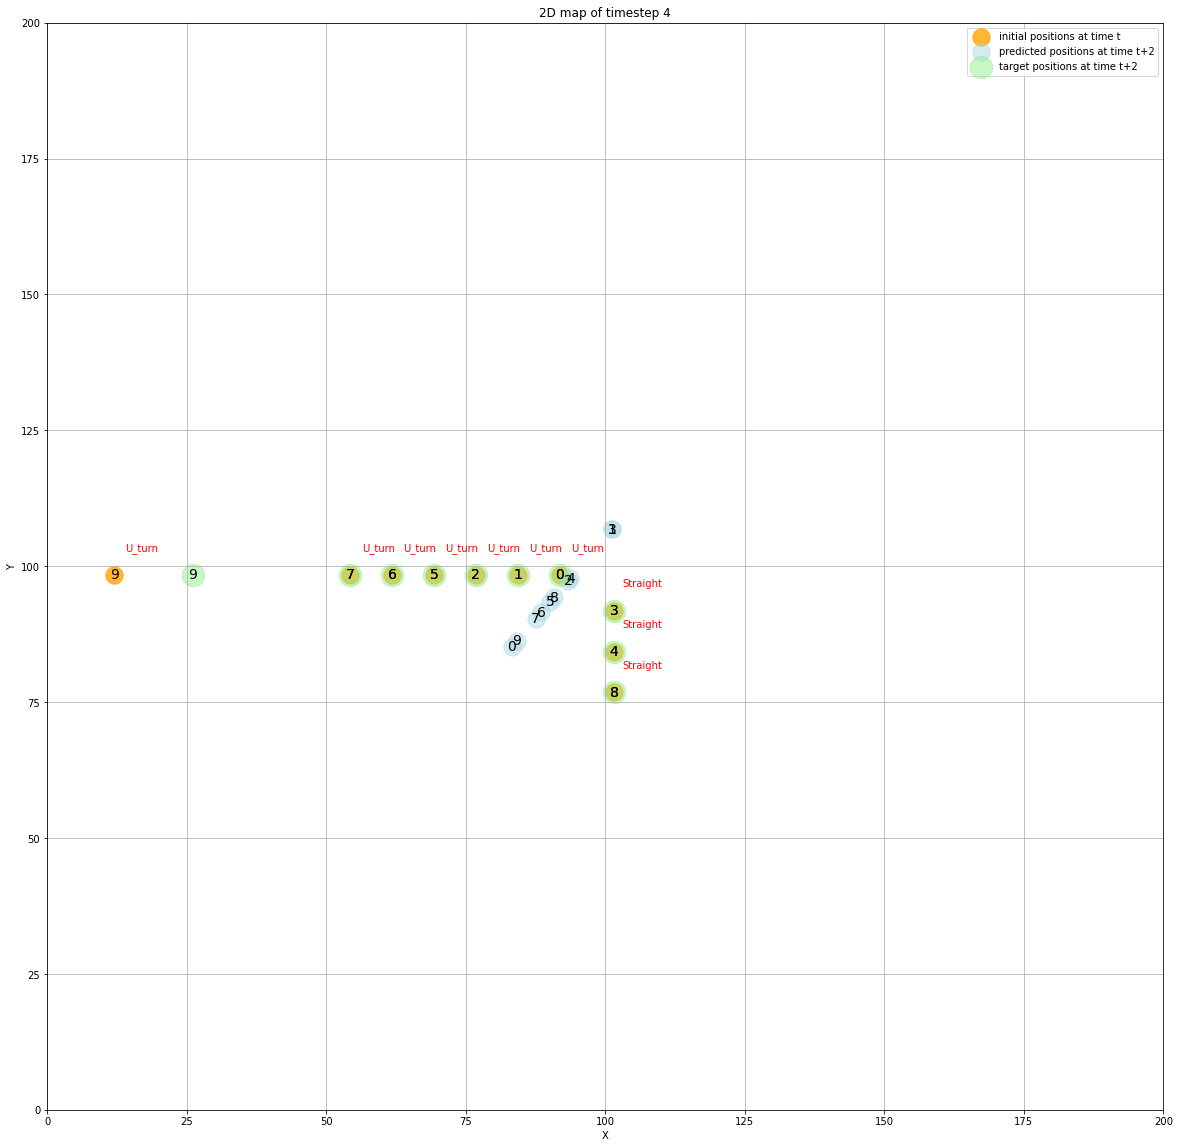

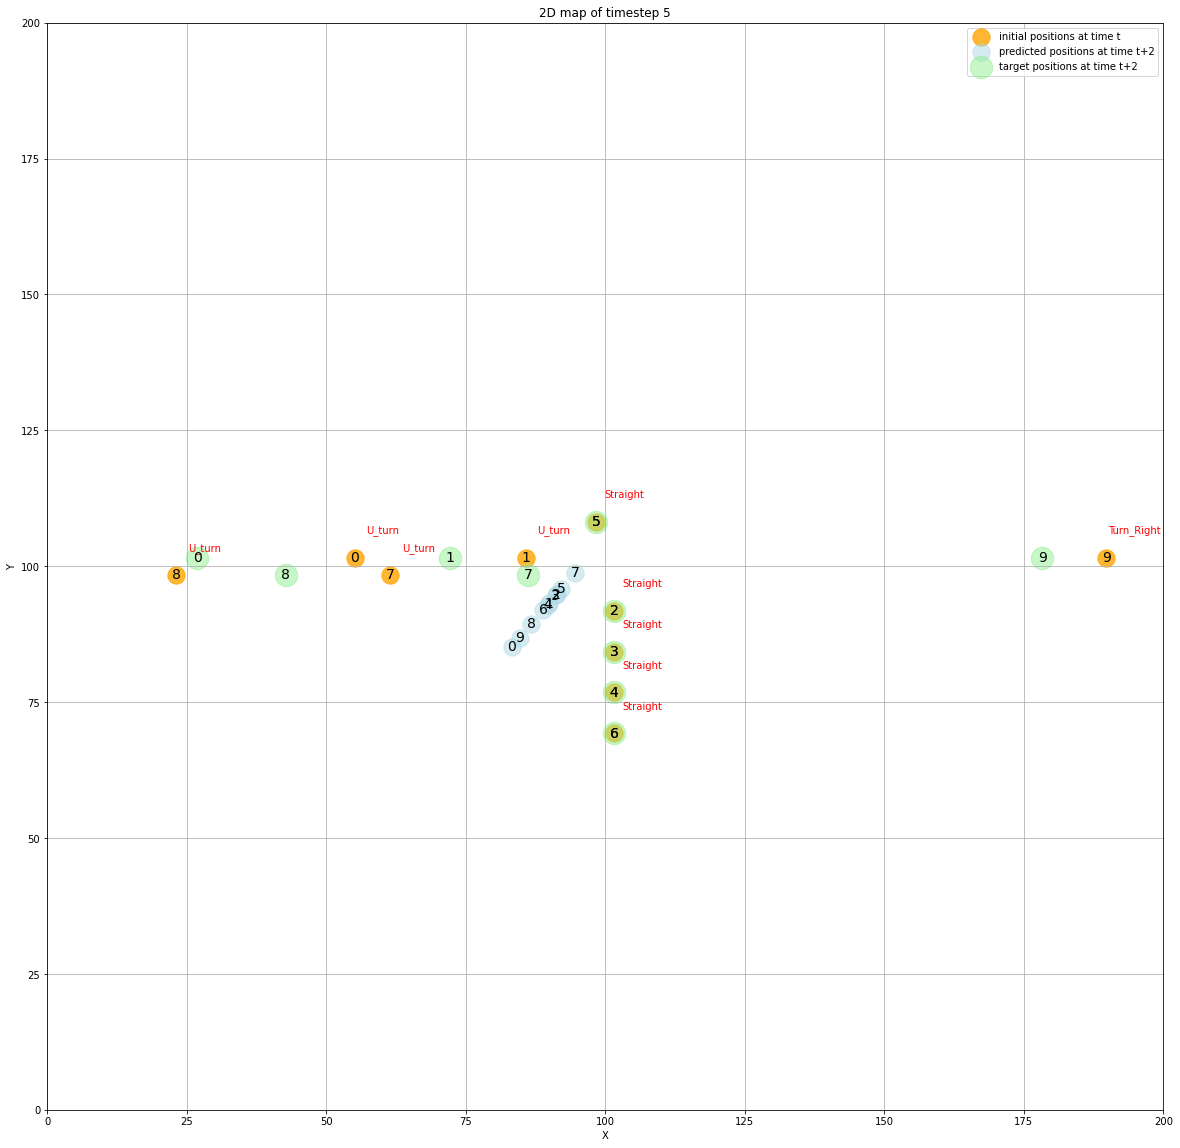

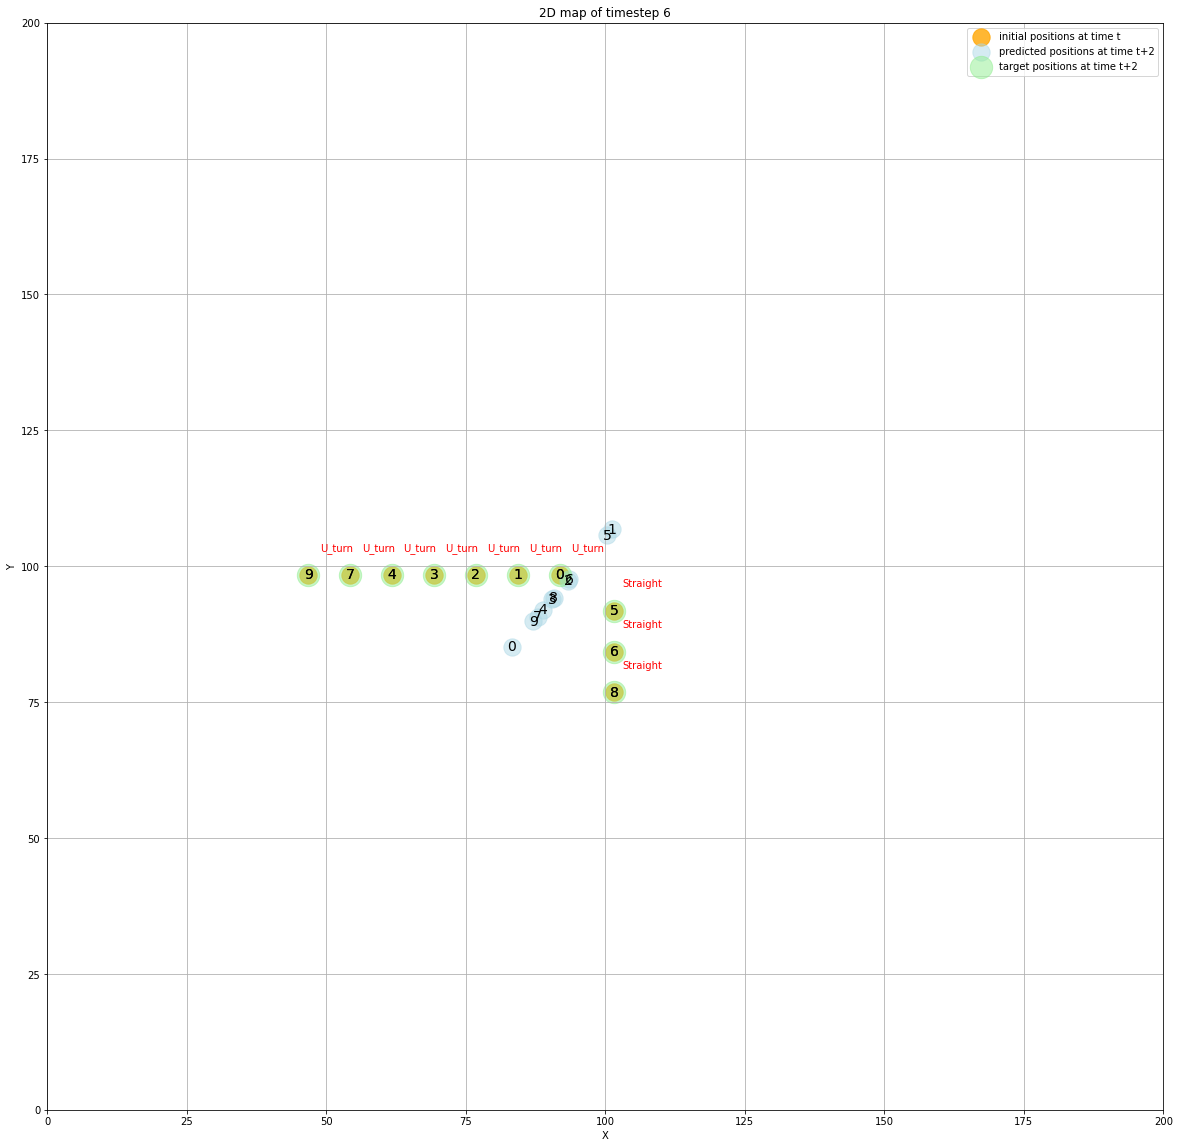

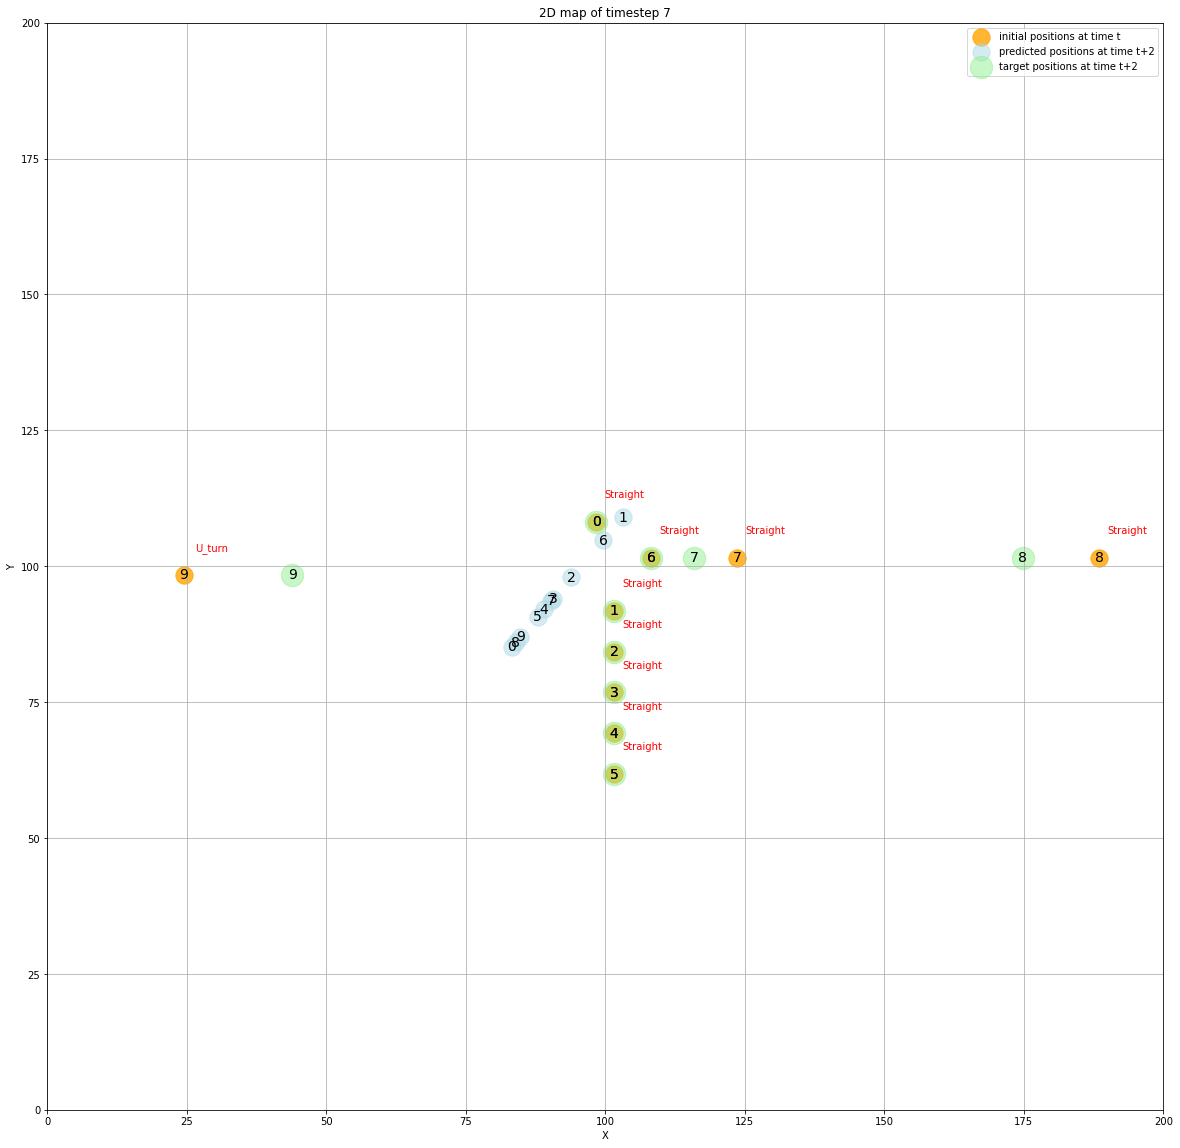

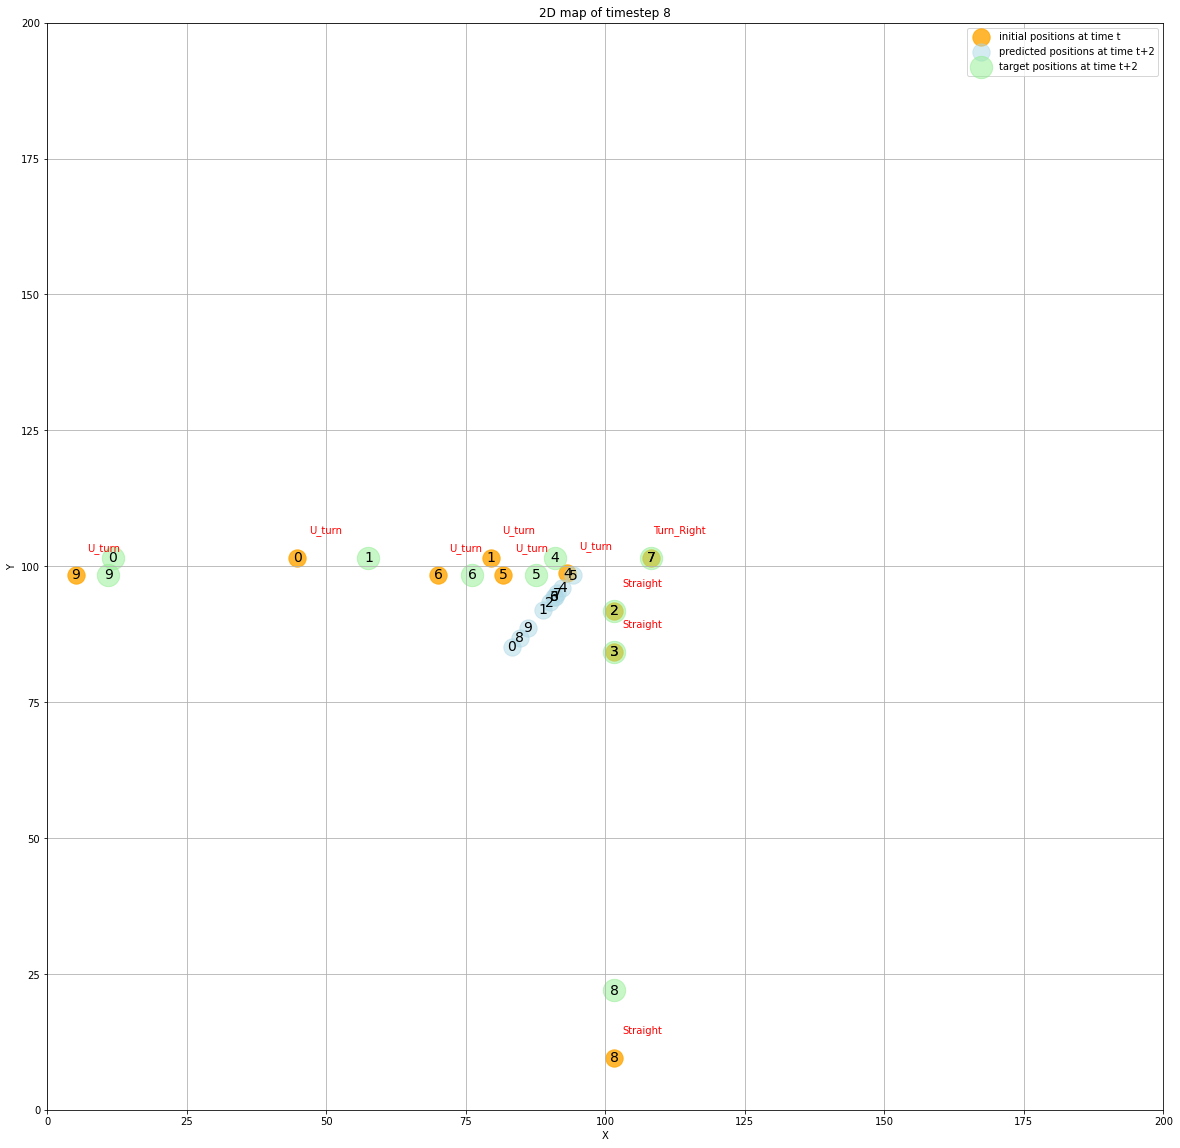

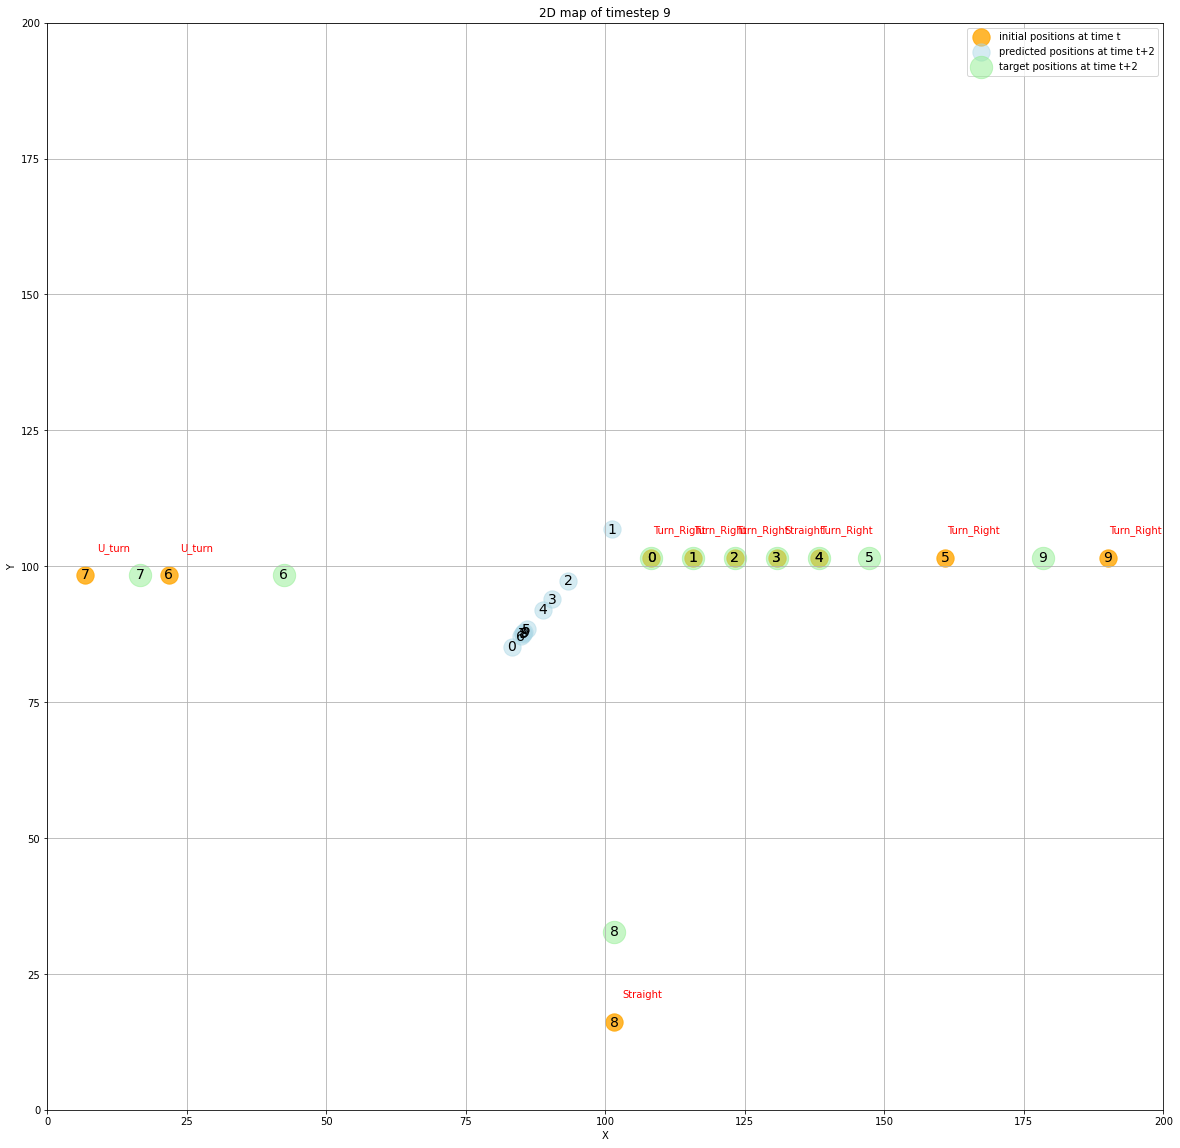

In [54]:
plot_results_model(
                   load_model, 
                   dataset_train,
                   start_from = 0,
                   end_at = 10,
                   edges_attr = True,
                   figsize = (20,20)
                  )

In [ ]:
deleted_folders = delete_empty_r(directory= OUTPUT_DIR,
                                                 printstat = True)